# _FINAL PROJECT - REINFORCEMENT LEARNING_

## Theory

*_Abstract_*\
In this project, we explore the use of Dynamic Programming (DP) algorithms to solve the Frozen Lake problem, as outlined in [1]. DP assumes the agent has complete knowledge of the Markov Decision Process (MDP). Additionally, we implement a Temporal Difference (TD) algorithm, specifically Q-Learning. Our objectives are to find the optimal policy and compare the performance of these three methods

_Introduction_ \
The key idea of DP, and reinforcement learning generally, is the use of value functions to organize and structure the search for good policies. Is necessary mentioned the _Bellman optimality equation_, which expresses the fact that the value of a state under an optimal policy must equal the expected return for the best action from that state:

$$ v_*(s) = \max_{a} \sum_{s',r}p(s',r|s,a) [r+\gamma v_*(s')]  $$

$$ q_*(s,a) = \sum_{s',r}p(s',r|s,a)[r+\gamma \max_{a'}q_*(s',a')] $$

relation between $v_*(s)$ and $q_*(s,a)$

$$ v_*(s) = \max_{a \in \mathcal{A}(s)} q_{\pi_*}(s,a) $$

* Policy Evaluation (Prediction)

First we consider how to compute the state-value function $v_\pi$ for an arbitrary policy $\pi$.\
This is called _policy evaluation_ in the DP. Thus, the expression for $v_\pi$ for all $s\in \mathcal{S}$,

$$ v_\pi(s) = \sum_a \pi(a|s) \sum_{s',r} p(s',r|s,a)[r+\gamma v_\pi(s')] $$

For our purposes, iterative solution method are most suitable, i.e., each successive approximatin is obtained by using Bellman equation for $v_\pi$ (above equation) as an update rule:

$$ v_{k+1}(s) = \sum_a \pi(a|s) \sum_{s',r} p(s',r|s,a)[r+\gamma v_\pi(s')] $$

This is known as _iterative policy evaluation_. In each iteration, we get an expected update, which means, that we substitute the old values for newas and better ones.

* Policy Improvement

Our reason for computing the value function for a policy is to help find better policies; the process of making a new policy that improves on an original policy, by making it greedy with respect to the value function of the original policy, is called _policy improvemente_

$$ \pi'(s) = \argmax_{a} \sum_{s',r} \sum_{s',r} p(s',r|s,a)[r+\gamma v_\pi(s')] $$

Policy improvement thus must give us a strictly better policy except when the original policy is already optimal. We are considering deterministic policies.

_Stochastic policy_ $\pi$ specifies probabilities. If there are severak actions at which the maximum is achieved-then in the stochastic csae we need not select a single action from among them. Instead, each maximizing action can be given a portion of the probability of being in the new greedy policy.

* Policy Iteration

$\pi_0 \rightarrow v_{\pi_0} \rightarrow \pi_1 \rightarrow v_{\pi_1} \rightarrow \pi_2 \rightarrow ... \rightarrow \pi_* \rightarrow v_*$

![Policy Iteration Algorithm](IMAGES/PolicyIteration.png)

_Drawback_:\
Each of its iterations involves policy evaluation, which may itself be a protracted iterative computation requiring multiple sweeps through the state set.

_However_, the policy evaluation step of policy iteration can be truncated in several ways without losing the convergence guarantees of policy iteration. One special case is when policy evaluation is stopped after just one sweep (one update of each state). This algorithm is called _VALUE ITERATION_:

* Value Iteration

Is a particulaly simple update operation that combines the policy improvement and truncated policy evaluation steps:

$$ v_{k+1}(s)  = \max_{a}\sum_{s',r}p(s',r|s,a)[r+\gamma v_k(s')] $$

Note that value iteration is obtained simply by turning the Bellman Optimality equation into an update rule.\
Value iteration effectively combines, in each of its sweeps, one sweep of policy evaluation and one sweep of policy improvement, as the image below shows

![Value Iteration Algorithm](IMAGES/ValueIteration.png)

_Drawback_\
A major drawback to the DP methods that we have discussed so far is that they involve operations over the entire state of the MDP, that is, they require sweeps of the state set. 

*  What more can we do?\
4.5 Asynchronous DP
4.6 Generalized Policy Iteration

* Why I chose these methods?
1) DP is quite efficient for not very large problems.
2) The time to find an optimal policy, in the worst case, is polynomial in the number of states and actions
* Why not Linear Programming?
1) The choice between DP and LP algorithms depends on the specific characteristics of the problem, the size of the state-action space, and the availability of computational resources. For many standard reinforcement learning problems like Frozen Lake, DP algorithms are often the go-to choice due to their simplicity and effectiveness.

_Summary_\
_Policy evaluation_ refers to the iterative computation of the value function for a given policy. _Policy improvement_ refers to the computation of an improved policy given the value funciton for that poliy. Putting these two computations together, we obtain _policy iteration_ and _value iteration_, the most popular DP methods.\

There are four primary value functions ($v_\pi, v_*, q_\pi, q_*$), there are four corresponding Bellman equations and four corresponding expected updates.

* Q-Learning

To talk about Q-Learning, we should talk first Temporal-Difference Learning:\
_TD learning_ is a combination of Monte Carlo (MC) ideas and DP ideas. Like MC mehtods, TD methods can learn directly form raw experience withour a model of the environment's dynamics. Like DP, TD mehtods update estimates based in part on other learned estimates, without waiting for a final outcome.

As usual, we star by focusing on the policy evaluation on prediction problem, the problem of estimating the value function $v_\pi$ for a given policy $\pi$. For the control problem (finding an optimal policy), DP, TD, and MC methods all use some variation of generalized policy iteration (GPI). The differences in the methods are primarily differences in their approaches to the prediction problem.

_6.1 TD Prediction_

TD methods need to wait only until the next time step to determine the incremet in $V(S_t)$. Which means, at time $t+1$ they immediately form a target and make a useful update using the observed reward $R_{t+1}$ and the estimate $V(S_{t+1})$. The simplest TD method makes the update

$$ V(S_t) \leftarrow V(S_t) + \alpha[R_{t+1} + \gamma V(S_{t+1}) - V(S_t)] $$

Immediately on transition $S_{t+1}$ and receiving $R_{t+1}$. The target for the TD is $R_{t+1}+ \gamma V(S_{t+1})$. This is called TD(0), one espetial case of TD($\lambda$).

* What advantages do TD methods have over DP methods?

1) They do not require a model of the environment, of its reward and next-state probability distributions.

2) TD methods are reliable because they allow learning by updating estimates based on other estimates, without waiting for the final outcome. This approach ensures convergence to the correct value function over time.

Before to talk about Q-Learning, we can mentioned that we face the need to trade off exploration and exploitation, and again approaches fall into two main classes: on-policy and off-policy.

In 6.4 Sarsa: On-policy TD Control, they present an on-policy TD control method.

One of the early breakthroughs in RL was the development of an off-policy TD control algorithm known as _Q-learning_, defined by

$$ Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha[R_{t+1} + \gamma \max_a Q(S_{t+1}, a)-Q(S_t,A_t)]  $$

In this case, the learned action-value function, Q, directly approximates $q_*$, the optimal action-value function, independet of the policy being followed
.

* Advantages: This dramatically simplifies the analyis of the algorithm and enabled early convergence proofs.

Q-learning algorithm is showed below

![Q-learning Algorithm](IMAGES/Q-learning.png)

_Everything written down here was taken from [1]_

## Libraries

In [1]:
import gym
import time
import pickle
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## *Frozen Lake (Navegation Problem)*

<img src="https://gymnasium.farama.org/_images/frozen_lake.gif" width="30%" alt="iris image" align="center">\

Winter is here. You and your friends were tossing around a frisbee at the park when you made a wild throw that left the frisbee out in the middle of the lake. The water is mostly frozen, but there are a few holes where the ice has melted.If you step into one of those holes, you'll fall into the freezing water. You have to navigate across the lake and retrieve the disc. 

In our case, Frozen Lake will be a a grid-like environment where each tile can be: 

1. **S**: starting point, safe 
2. **F**: frozen surface, safe
3. **H**: hole, fall to your doom
4. **G**: goal, where the disc is located

Important things to know are that: 
* The game ends if you step in to a hole or get to your goal
* You receive a reward of 1 if you reach the goal, and zero otherwise.

Let's initialize our environment and explore it a bit.

### Libraries

In [2]:
# import gym
# import time
# import pickle
# import warnings
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

### Exploration of Frozen Lake Environment

#### First approach

In [3]:
# '''Make the environment'''
# # render_mode = 'human', show me the environment as an input :o
# env = gym.make('FrozenLake-v1', render_mode='human', is_slippery=False)
# env.reset()
# env.render()
# # env.close()
# '''Important attributes of the environment'''
# env.observation_space, env.action_space, env.P, env.reward_range, env.metadata
# # Summary of FrozenLake-v1
# # env.spec

# '''Actions and States and Rewards and Transition Probabilities'''
# # Actions (env.action_space.sample() to get a random action)
# #  0 - Left, 1 - Down, 2 - Right, 3 - Up
# # States (env.observation_space.sample() to get a random state)
# # 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15
# # Rewards
# # 1 - Goal, 0 - Hole, 0 - Frozen
# # Transition Probabilities (env.P[state][action])
# # Deterministic (is_slippery=False): 1.0, 
# # Stochastic (is_slippery=True): 0.33: selected state, perpendicular states
# '''Let's play a little bit with the environment'''
# randomAction = env.action_space.sample()
# # Simplyfying the above step
# returnValue = env.step(randomAction)
# # Motion in the environment
# returnValue
# # Inputs: state, reward, done, truncated, transition probability

# '''Let's generate an episode'''
# numberOfIterations = 17
# for i in range(numberOfIterations):
#     randomAction = env.action_space.sample()
#     returnValue = env.step(randomAction)
#     print(f'Iteration: {i}, Action: {randomAction}, State: {returnValue[0]}, Reward: {returnValue[1]}')
#     time.sleep(0.5) # Go slow
#     if returnValue[2]: # If done returnValue[2] represents if Armando has reached a terminal state
#         break

#### Formalizing the approach

We can start importing the libraries necessaries

In [4]:
import gym
import pickle
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict, deque

Secondly, we can create an environment that contains the FrozenLake

In [5]:
env = gym.make('FrozenLake-v1')

#Let me rename the states and actions because many of my references used
#the frozenlake-v0 environment and the states and actions are as follows:
env.nS = env.observation_space.n
env.nA = env.action_space.n

#Let's see the state and action space
print(f'For the frozen lake 4x4 we will have {env.nS} states and {env.nA} actions')

For the frozen lake 4x4 we will have 16 states and 4 actions


The representation of these states and the actions can be write down as follows:
```
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
```
and the agent has 4 potential actions:
```
LEFT = 0
DOWN = 1
RIGHT = 2
UP = 3
```
Or well, as we wrote down in class: $\mathcal{S} = \{0,1,2,3,...,15\}$; $\mathcal{A}=\{0,1,2,3\}$.This can be generalized in a easy way for the grid 8x8.\
The dynamics of the environment are given by the following command

In [6]:
env.P

{0: {0: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 4, 0.0, False)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 4, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  2: [(0.3333333333333333, 4, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)],
  3: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},
 1: {0: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 5, 0.0, True)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 5, 0.0, True),
   (0.3333333333333333, 2, 0.0, False)],
  2: [(0.3333333333333333, 5, 0.0, True),
   (0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  3: [(0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},
 2:

which give more than the only dynamics, in fact, it give us the information neccesary to define our MDP problem. Let us explain with more detail\
Each piece of the output is define by ```prob, next_state, reward, done```\
where: 
- `prob` details the conditional probability of the corresponding (`next_state`, `reward`) pair, and
- `done` is `True` if the `next_state` is a terminal state, and otherwise `False`.

For example, if we choose ```env.P[1][0]```, the interpretation of the output is
$$
\mathbb{P}(S_{t+1}=s',R_{t+1}=r|S_t=1,A_t=0) = \begin{cases}
               \frac{1}{3} \text{ if } s'=1, r=0\\
               \frac{1}{3} \text{ if } s'=0, r=0\\
               \frac{1}{3} \text{ if } s'=5, r=0\\
               0 \text{ else}
            \end{cases}
$$

But this is just if ```is_slippery=True```, otherwise, 

$$
\mathbb{P}(S_{t+1}=s',R_{t+1}=r|S_t=1,A_t=0) = \begin{cases}
               1 \text{ if } s'=5, r=0\\
               0 \text{ else}
            \end{cases}
$$

The mentioned is shown below

In [7]:
env = gym.make('FrozenLake-v1', is_slippery=False)
a = env.P[1][0]
env = gym.make('FrozenLake-v1', is_slippery=True)
b = env.P[1][0]
print(f'For the deterministic environment: {a}')
print(f'For the stochastic environment: {b}')

For the deterministic environment: [(1.0, 0, 0.0, False)]
For the stochastic environment: [(0.3333333333333333, 1, 0.0, False), (0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 5, 0.0, True)]


## Dynamic Programming

In [8]:
env = gym.make('FrozenLake-v1', is_slippery=True, map_name='4x4')

env.nS = env.observation_space.n
env.nA = env.action_space.n

### Policy Iteration

As we already explained, the algorithm for this method is composed by _policy evaluation_ and _policy improvement_

#### Iterative Policy Evaluation

Our reason to compute the value function for a policy is to help find better policies

In [9]:
def policy_evaluation(env, policy, gamma=0.9, theta=1e-8):
    V = np.zeros(env.nS)
    while True:
        delta = 0
        for s in range (env.nS):
            Vs = 0
            for a, action_prob in enumerate(policy[s]):
                # print(a, action_prob)
                for prob, next_state, reward, done in env.P[s][a]:
                    Vs += action_prob * prob * (reward + gamma * V[next_state])
            delta = max(delta, np.abs(V[s] - Vs))
            V[s] = Vs
        if delta < theta:
            break
    return V

The random policy will be considered as equiprobable, i.e., $\pi(a|s) = \frac{1}{|\mathcal{A}(s)|}$ for all $s\in\mathcal{S}$ and $a\in\mathcal{A}(s)$.\
Thus, we can specify a random policy as follows

In [10]:
random_policy = np.ones([env.nS, env.nA]) / env.nA
random_policy
# This is the first value of delta

array([[0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25]])

In [11]:
V = policy_evaluation(env, random_policy)
V

array([0.00447724, 0.00422245, 0.01006675, 0.00411821, 0.00672195,
       0.        , 0.02633371, 0.        , 0.01867615, 0.05760701,
       0.10697195, 0.        , 0.        , 0.13038305, 0.39149016,
       0.        ])

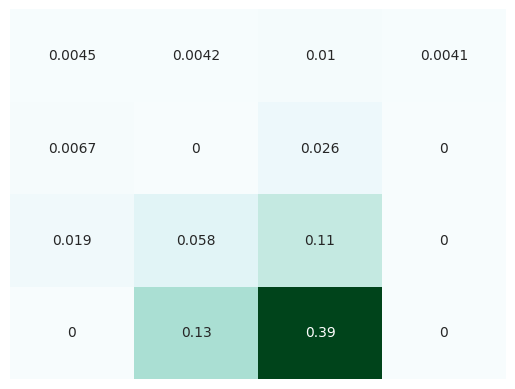

In [12]:
# evaluate the policy 
V = policy_evaluation(env, random_policy)


sns.heatmap(V.reshape(4,4), annot=True, cbar=False, cmap='BuGn', xticklabels=False, yticklabels=False)
plt.show()
# plt.title('State-Value function')

#### Policy Improvement

We know how good it is to follow the current policy from $s$-that is $v_{\pi}(s)-but would it better or worse to change to the new policy? One way to answer this question is to consider selecting $a$ in $s$ and thereafter following the existing policy, $\pi$. i.e., Is there a better policy?

With this in mind, we should to calculate $q_\pi(s,a)$ as follows

In [13]:
def q_from_v(env, V, s, gamma=1):
    q = np.zeros(env.nA)
    for a in range(env.nA):
        for prob, next_state, reward, done in env.P[s][a]:
            q[a] += prob * (reward + gamma * V[next_state])    
    return q

In [14]:
#Let's see the Q values for the state 0
s = 0
q = q_from_v(env, V, s)
q

array([0.00522548, 0.00514055, 0.00514055, 0.00439231])

In [15]:
#And for all the states
Q = np.zeros([env.nS, env.nA])
for s in range(env.nS):
    Q[s] = q_from_v(env, V, s)
print('Action-Value Function:')
print(Q)

Action-Value Function:
[[0.00522548 0.00514055 0.00514055 0.00439231]
 [0.0028999  0.004848   0.00476307 0.00625548]
 [0.01354097 0.01155812 0.01350622 0.0061358 ]
 [0.00472832 0.00472832 0.00274548 0.00610106]
 [0.00995845 0.00846603 0.0077178  0.00373306]
 [0.         0.         0.         0.        ]
 [0.0390129  0.03565732 0.0390129  0.00335558]
 [0.         0.         0.         0.        ]
 [0.00846603 0.02542772 0.02144299 0.02766837]
 [0.0496864  0.08534371 0.07911833 0.0418827 ]
 [0.15847696 0.14969906 0.13927462 0.02798024]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.06266335 0.17395774 0.19316007 0.14969906]
 [0.20961505 0.50729107 0.49948737 0.41245166]
 [0.         0.         0.         0.        ]]


<Axes: >

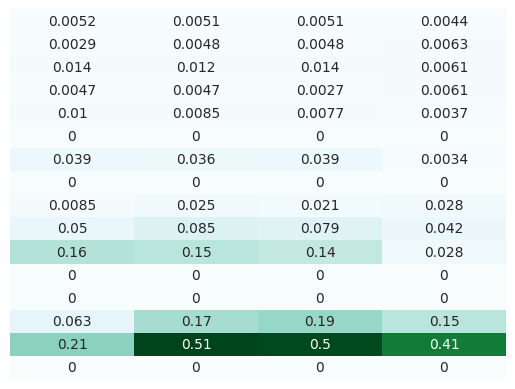

In [16]:
# Let's plot the Q values just to see how it will improve later
sns.heatmap(Q, annot=True, cbar=False, cmap='BuGn', xticklabels=False, yticklabels=False)

In [17]:
def policy_improvement(env, V, gamma=1):
    policy = np.zeros([env.nS, env.nA]) / env.nA
    for s in range(env.nS):
        q = q_from_v(env, V, s, gamma)

        # OPTION 1: construct a deterministic policy
        # policy[s][np.argmax(q)] = 1

        # OPTION 2: construct a stochastic policy that puts equal probability on maximizing actions
        best_a = np.argwhere(q==np.max(q)).flatten()
        policy[s] = np.sum([np.eye(env.nA)[i] for i in best_a], axis=0)/len(best_a)
        
    return policy

Policy:[[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]]


<Axes: >

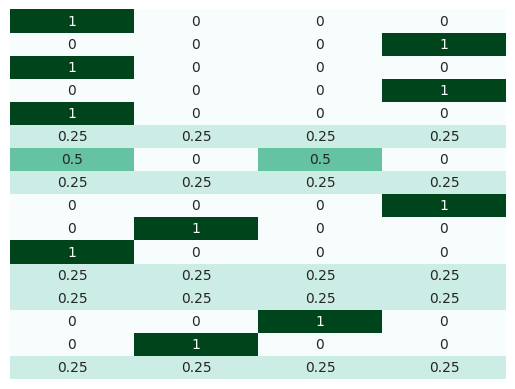

In [18]:
policy = policy_improvement(env, V)
print(f'Policy:{policy}')
sns.heatmap(policy, annot=True, cbar=False, cmap='BuGn', xticklabels=False, yticklabels=False)

Finally, we can implement the policy iteration with the functions already obtained

In [19]:
def policy_iteration(env, gamma=1, theta=1e-8):
    policy = np.ones([env.nS, env.nA]) / env.nA
    while True:
        V = policy_evaluation(env, policy, gamma, theta)
        new_policy = policy_improvement(env, V)

        # OPTION 1: stop if the policy is unchanged after an improvement step
        if (new_policy == policy).all():
            break

        # OPTION 2: stop if the value function estimates for successive policies has converged
        # if np.max(abs(policy_evaluation(env, policy) - policy_evaluation(env, new_policy))) < theta*1e2:
        #     break;

        policy = new_policy    
    return policy, V

Finally, we can **compare the optimal state-value function from the _policy evaluation_**, and also, the value-state function obtained in just one step before


Optimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):
[[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]] 



<Axes: >

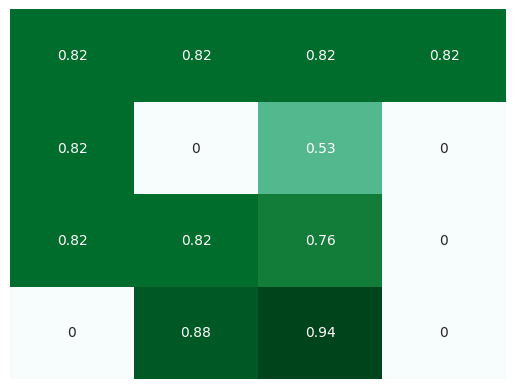

In [20]:
# obtain the optimal policy and optimal state-value function
policy_pi, V_pi = policy_iteration(env)

# print the optimal policy
print("\nOptimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):")
print(policy_pi,"\n")

sns.heatmap(V_pi.reshape(4,4), annot=True, cbar=False, cmap='BuGn', xticklabels=False, yticklabels=False)
# plt.title('Optimal State-Value function')

Something interesting that we feel that is not mentioned a lot, is the _truncated policy iteration_, as the name suggests, we should to create truncation for policy evaluation and policy iteration as follows

#### Truncated Policy

In [21]:
def truncated_policy_evaluation(env, policy, V, max_it=1, gamma=1):
    
    num_it=0
    while num_it < max_it:
        for s in range(env.nS):
            v = 0
            q = q_from_v(env, V, s, gamma)
            for a, action_prob in enumerate(policy[s]):
                v += action_prob * q[a]
            V[s] = v
        num_it += 1
    return V

In [22]:
def truncated_policy_iteration(env, max_it=1, gamma=1, theta=1e-8):
    V = np.zeros(env.nS)
    policy = np.zeros([env.nS, env.nA]) / env.nA
    while True:
        policy = policy_improvement(env, V)
        old_V = V.copy()
        V = truncated_policy_evaluation(env, policy, V, max_it, gamma)
        if max(abs(V - old_V)) < theta:
            break
    return policy, V


Optimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):
[[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]] 



Text(0.5, 1.0, 'State-Value Function (Truncated Policy Iteration)')

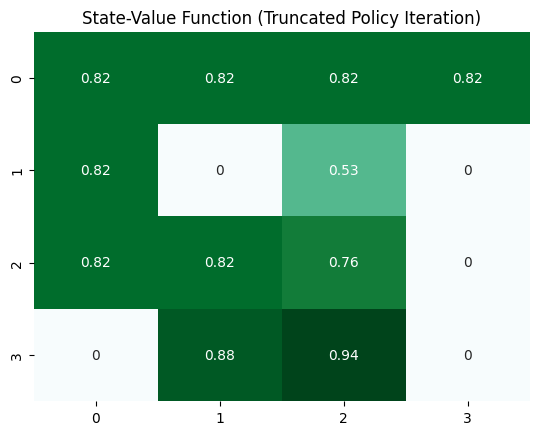

In [23]:
policy_tpi, V_tpi = truncated_policy_iteration(env, max_it=2)

# print the optimal policy
print("\nOptimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):")
print(policy_tpi,"\n")

# plot the optimal state-value function
sns.heatmap(V_tpi.reshape(4,4), annot=True, cbar=False, cmap='BuGn')
plt.title('State-Value Function (Truncated Policy Iteration)')

### Value Iteration

In the same way, as we mentioned in the theory,  note how the value iteration update is identical to the policy evaluation update except that it requires the maximum to be taken over all actions.

In [24]:
def value_iteration(env, gamma=1, theta=1e-8):
    V = np.zeros(env.nS)
    while True:
        delta = 0
        for s in range(env.nS):
            v = V[s]
            V[s] = max(q_from_v(env, V, s, gamma))
            delta = max(delta, abs(V[s] - v))
        if delta < theta:
            break
    policy = policy_improvement(env, V, gamma)
    return policy, V


Optimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):
[[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]] 



<Axes: >

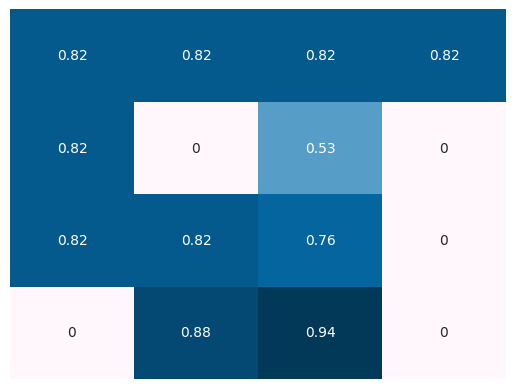

In [25]:
policy_vi, V_vi = value_iteration(env)

# print the optimal policy
print("\nOptimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):")
print(policy_vi,"\n")

# plot the optimal state-value function
sns.heatmap(V_vi.reshape(4,4), annot=True, cbar=False, cmap='PuBu', xticklabels=False, yticklabels=False)
# plt.title('State-Value Function (Value Iteration)')

## Temporal-Difference method

### Q-Learning

Finally, Q-Learning algortihm is defined as follows

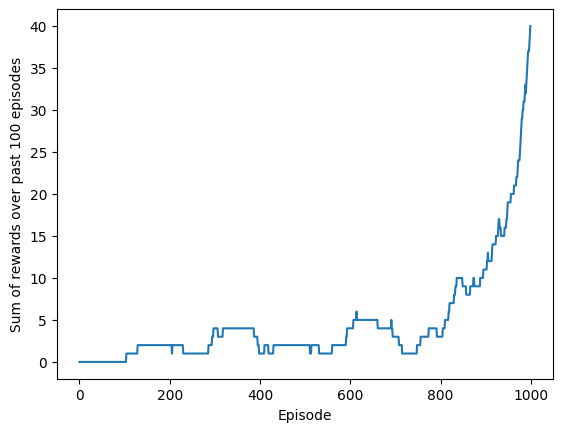

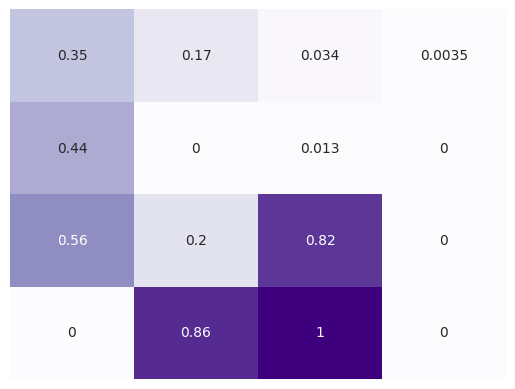

In [26]:
warnings.filterwarnings("ignore", category=DeprecationWarning, message=".*np.bool8.*")

def run(episodes, is_training=True, render=False):

    env = gym.make('FrozenLake-v1', map_name="4x4", is_slippery=True, render_mode='' if render else None)

    if(is_training):
        q = np.zeros((env.observation_space.n, env.action_space.n)) # init a 64 x 4 array
        # print(env.observation_space.n, env.action_space.n)
    else:
        f = open('frozen_lake4x4.pkl', 'rb')
        q = pickle.load(f)
        f.close()

    learning_rate_a = 0.9 # alpha or learning rate
    discount_factor_g = 0.9 # gamma or discount rate. Near 0: more weight/reward placed on immediate state. Near 1: more on future state.
    epsilon = 1         # 1 = 100% random actions
    epsilon_decay_rate = 0.001        # epsilon decay rate. 1/0.0001 = 10,000
    rng = np.random.default_rng()   # random number generator

    rewards_per_episode = np.zeros(episodes)

    for i in range(episodes):
        state = env.reset()[0]  # states: 0 to 63, 0=top left corner,63=bottom right corner
        terminated = False      # True when fall in hole or reached goal
        truncated = False       # True when actions > 200

        while(not terminated and not truncated):
            if is_training and rng.random() < epsilon:
                action = env.action_space.sample() # actions: 0=left,1=down,2=right,3=up
            else:
                action = np.argmax(q[state,:])

            new_state,reward,terminated,truncated,_ = env.step(action)

            if is_training:
                q[state,action] = q[state,action] + learning_rate_a * (
                    reward + discount_factor_g * np.max(q[new_state,:]) - q[state,action]
                )

            state = new_state

        epsilon = max(epsilon - epsilon_decay_rate, 0)

        if(epsilon==0):
            learning_rate_a = 0.0001

        if reward == 1:
            rewards_per_episode[i] = 1

    env.close()

    sum_rewards = np.zeros(episodes)
    for t in range(episodes):
        sum_rewards[t] = np.sum(rewards_per_episode[max(0, t-100):(t+1)])
    plt.plot(sum_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Sum of rewards over past 100 episodes')
    plt.savefig('frozen_lake8x8_Slippery.png')
    plt.show()

    if is_training:
        f = open("frozen_lake8x8.pkl","wb")
        pickle.dump(q, f)
        f.close()
        # Visualize the best Q-table
        best_actions = np.argmax(q, axis=1)
        best_q_table = np.max(q, axis=1).reshape((4,4))
        sns.heatmap(best_q_table, annot=True, cbar=False, cmap='Purples', xticklabels=False, yticklabels=False)
        # plt.title('Best Q-Table')
        plt.show()

run(1000, is_training=True, render=False)

## Additional things

Here, I will include some things that I try with my code and works, but for stetics and for be afraid to damge the original document, I prefer to do it here

#### About _policy iteration_

Policy converged after 3 iterations
Delta values per iteration: [0.7665478109608488, 0.2869439117323771, 0.0]
Time per iteration: [0.11002326011657715, 0.24986672401428223, 0.3252990245819092]


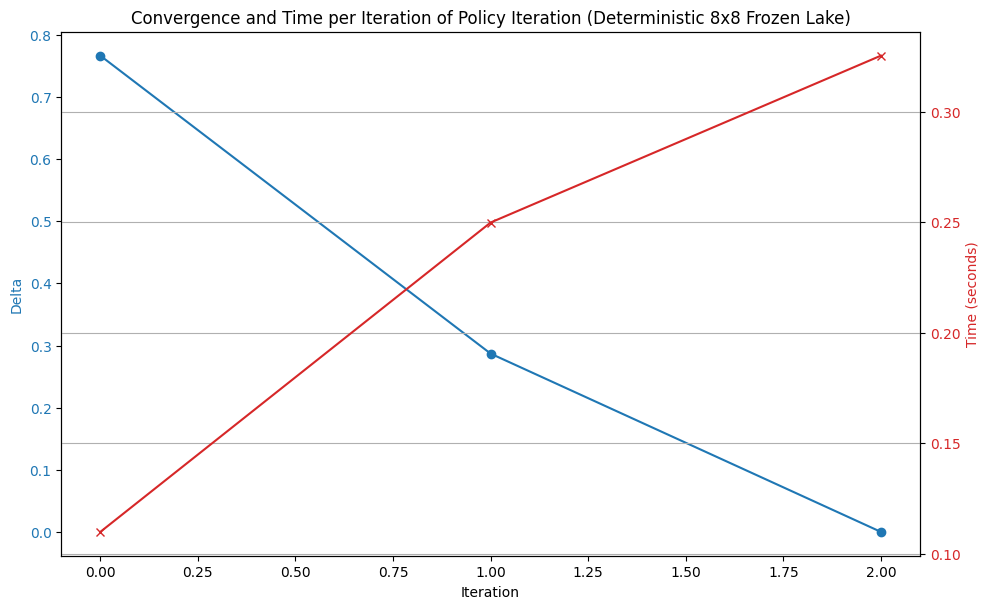

In [27]:
env = gym.make('FrozenLake-v1', is_slippery=True, map_name='4x4')

env.nS = env.observation_space.n
env.nA = env.action_space.n

def policy_evaluation(env, policy, gamma=1, theta=1e-8):
    V = np.zeros(env.nS)
    while True:
        delta = 0
        for s in range(env.nS):
            Vs = 0
            for a, action_prob in enumerate(policy[s]):
                for prob, next_state, reward, done in env.P[s][a]:
                    Vs += action_prob * prob * (reward + gamma * V[next_state])
            delta = max(delta, np.abs(V[s] - Vs))
            V[s] = Vs
        if delta < theta:
            break
    return V

def policy_improvement(env, V, gamma=1):
    policy = np.zeros([env.nS, env.nA]) / env.nA
    for s in range(env.nS):
        q = q_from_v(env, V, s, gamma)
        best_a = np.argwhere(q == np.max(q)).flatten()
        policy[s] = np.sum([np.eye(env.nA)[i] for i in best_a], axis=0) / len(best_a)
    return policy

def policy_iteration(env, gamma=1, theta=1e-8):
    policy = np.ones([env.nS, env.nA]) / env.nA
    iter_count = 0
    delta_list = []
    time_list = []
    
    while True:
        iter_count += 1
        start_time = time.time()
        V = policy_evaluation(env, policy, gamma, theta)
        new_policy = policy_improvement(env, V)
        delta = np.max(abs(policy_evaluation(env, policy) - policy_evaluation(env, new_policy)))
        end_time = time.time()
        
        delta_list.append(delta)
        time_list.append(end_time - start_time)
        
        if delta < theta * 1e2:
            break

        policy = new_policy
    
    return policy, V, iter_count, delta_list, time_list

def q_from_v(env, V, s, gamma=1):
    q = np.zeros(env.nA)
    for a in range(env.nA):
        for prob, next_state, reward, done in env.P[s][a]:
            q[a] += prob * (reward + gamma * V[next_state])
    return q

policy_pi, V_pi, iter_count, delta_list, time_list = policy_iteration(env)

print(f"Policy converged after {iter_count} iterations")
print("Delta values per iteration:", delta_list)
print("Time per iteration:", time_list)

# Plotting the delta values and time per iteration
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Delta', color=color)
ax1.plot(delta_list, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Time (seconds)', color=color)
ax2.plot(time_list, marker='x', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Convergence and Time per Iteration of Policy Iteration (Deterministic 8x8 Frozen Lake)')
plt.grid(True)
plt.show()

#### About _value iteration_

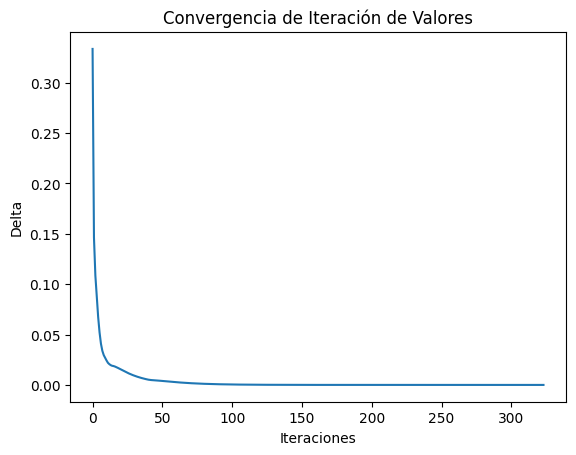

In [28]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('FrozenLake-v1', is_slippery=True, map_name='4x4')

env.nS = env.observation_space.n
env.nA = env.action_space.n

def q_from_v(env, V, s, gamma=1):
    q = np.zeros(env.nA)
    for a in range(env.nA):
        for prob, next_state, reward, done in env.P[s][a]:
            q[a] += prob * (reward + gamma * V[next_state])    
    return q

def policy_improvement(env, V, gamma=1):
    policy = np.zeros([env.nS, env.nA]) / env.nA
    for s in range(env.nS):
        q = q_from_v(env, V, s, gamma)

        # OPTION 1: construct a deterministic policy
        # policy[s][np.argmax(q)] = 1

        # OPTION 2: construct a stochastic policy that puts equal probability on maximizing actions
        best_a = np.argwhere(q==np.max(q)).flatten()
        policy[s] = np.sum([np.eye(env.nA)[i] for i in best_a], axis=0)/len(best_a)

    return policy

def value_iteration(env, gamma=1, theta=1e-8):
    V = np.zeros(env.nS)
    deltas = []
    while True:
        delta = 0
        for s in range(env.nS):
            v = V[s]
            V[s] = max(q_from_v(env, V, s, gamma))
            delta = max(delta, abs(V[s] - v))
        deltas.append(delta)
        if delta < theta:
            break
    policy = policy_improvement(env, V, gamma)
    return policy, V, deltas

policy, V, deltas = value_iteration(env, gamma=0.99, theta=1e-8)

# Graficar la convergencia
plt.plot(deltas)
plt.xlabel('Iteraciones')
plt.ylabel('Delta')
plt.title('Convergencia de Iteración de Valores')
plt.show()

#### About Q-learning

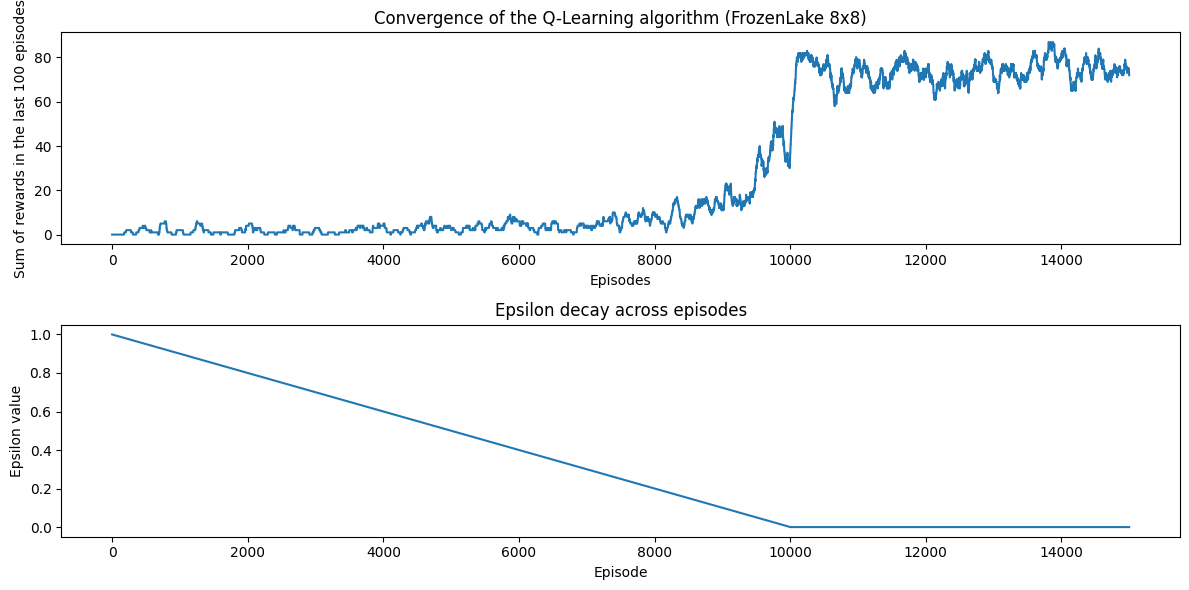

In [29]:
# Ignore deprecation warnings related to np.bool8
warnings.filterwarnings("ignore", category=DeprecationWarning, message=".*np.bool8.*")

def run(episodes, is_training=True, render=False):
    # Create the FrozenLake environment
    env = gym.make('FrozenLake-v1', map_name="4x4", is_slippery=True, render_mode='' if render else None)

    if is_training:
        q = np.zeros((env.observation_space.n, env.action_space.n))  # Initialize Q-Table
    else:
        with open('frozen_lake4x4.pkl', 'rb') as f:
            q = pickle.load(f)  # Load Q-Table from file

    learning_rate_a = 0.9  # Learning rate
    discount_factor_g = 0.9  # Discount factor
    epsilon = 1  # Exploration rate
    epsilon_decay_rate = 0.0001  # Epsilon decay rate
    rng = np.random.default_rng()  # Random number generator

    rewards_per_episode = np.zeros(episodes)
    epsilon_values = np.zeros(episodes)  # Track epsilon values

    for i in range(episodes):
        state = env.reset()[0]
        terminated = False
        truncated = False

        while not terminated and not truncated:
            if is_training and rng.random() < epsilon:
                action = env.action_space.sample()  # Explore: choose random action
            else:
                action = np.argmax(q[state, :])  # Exploit: choose best action

            new_state, reward, terminated, truncated, _ = env.step(action)

            if is_training:
                # Update Q-Table
                q[state, action] = q[state, action] + learning_rate_a * (
                    reward + discount_factor_g * np.max(q[new_state, :]) - q[state, action]
                )

            state = new_state

        # Decay epsilon
        epsilon = max(epsilon - epsilon_decay_rate, 0)
        epsilon_values[i] = epsilon

        # Adjust learning rate when epsilon reaches zero
        if epsilon == 0:
            learning_rate_a = 0.0001

        # Record reward if successful
        if reward == 1:
            rewards_per_episode[i] = 1

    env.close()

    # Calculate the sum of rewards in the last 100 episodes
    sum_rewards = np.zeros(episodes)
    for t in range(episodes):
        sum_rewards[t] = np.sum(rewards_per_episode[max(0, t-100):(t+1)])

    # Visualization of results
    plt.figure(figsize=(12, 6))
    
    # Plot sum of rewards over the last 100 episodes
    plt.subplot(2, 1, 1)
    plt.plot(sum_rewards)
    plt.xlabel('Episodes')
    plt.ylabel('Sum of rewards in the last 100 episodes')
    plt.title('Convergence of the Q-Learning algorithm (FrozenLake 8x8)')

    # Plot epsilon decay over episodes
    plt.subplot(2, 1, 2)
    plt.plot(epsilon_values)
    plt.xlabel('Episode')
    plt.ylabel('Epsilon value')
    plt.title('Epsilon decay across episodes')

    plt.tight_layout()
    plt.savefig('frozen_lake4x4_convergence.png')
    plt.show()

    if is_training:
        # Save the Q-Table to a file
        with open("frozen_lake4x4.pkl", "wb") as f:
            pickle.dump(q, f)
        
        # Visualize the best Q-Table
        best_q_table = np.max(q, axis=1).reshape((4, 4))  # Adjust shape for 4x4 grid
        # sns.heatmap(best_q_table, annot=True, cbar=False, cmap='BuGn', xticklabels=False, yticklabels=False)
        # plt.title('Best Q-Table')
        # plt.show()

# Run the function with 15000 episodes for training
run(15000, is_training=True, render=False)

#### About Convergence

You can find these elements in notebook 0.1_RL_FinalNotebook_convergenceTime, because most of the algorithms there are taken from [5]

# References
[1] Rechard S. Sutton and Andrew G. Barto. Reinforcement Learning : An Introduction, second edition. The MIT Press, Cambridge, Massachusetts, London, England, 2018, 2020.\
[2] https://gymnasium.farama.org/environments/toy_text/frozen_lake/#frozen-lake\
[3] https://karan-jakhar.medium.com/100-days-of-code-day-1-35afe174000e\
[4] https://medium.com/swlh/frozen-lake-as-a-markov-decision-process-1692815ecfd1\
[5] https://aleksandarhaber.com/installation-and-getting-started-with-openai-gym-and-frozen-lake-environment-reinforcement-learning-tutorial/\
Comments:
I am always talking as 'we' because copilot was a very useful tool in this journey